**Prerequisites**: 
    - numpy
    - straph
    - matplotlib
    - seaborn
    - networkx

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from straph import stream as sg
import straph.generators as gen

In [3]:
plt.rcParams["figure.figsize"] = (20,10)

# Temporal Paths in Stream Graph

In this tutorial we will use the example below, feel free to change it (cf: Notebook on random stream graphs).

In [4]:
path_directory = os.getcwd()+"/examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                      path_links=path_directory + "example_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  7
Nb of segmented links :  10.0


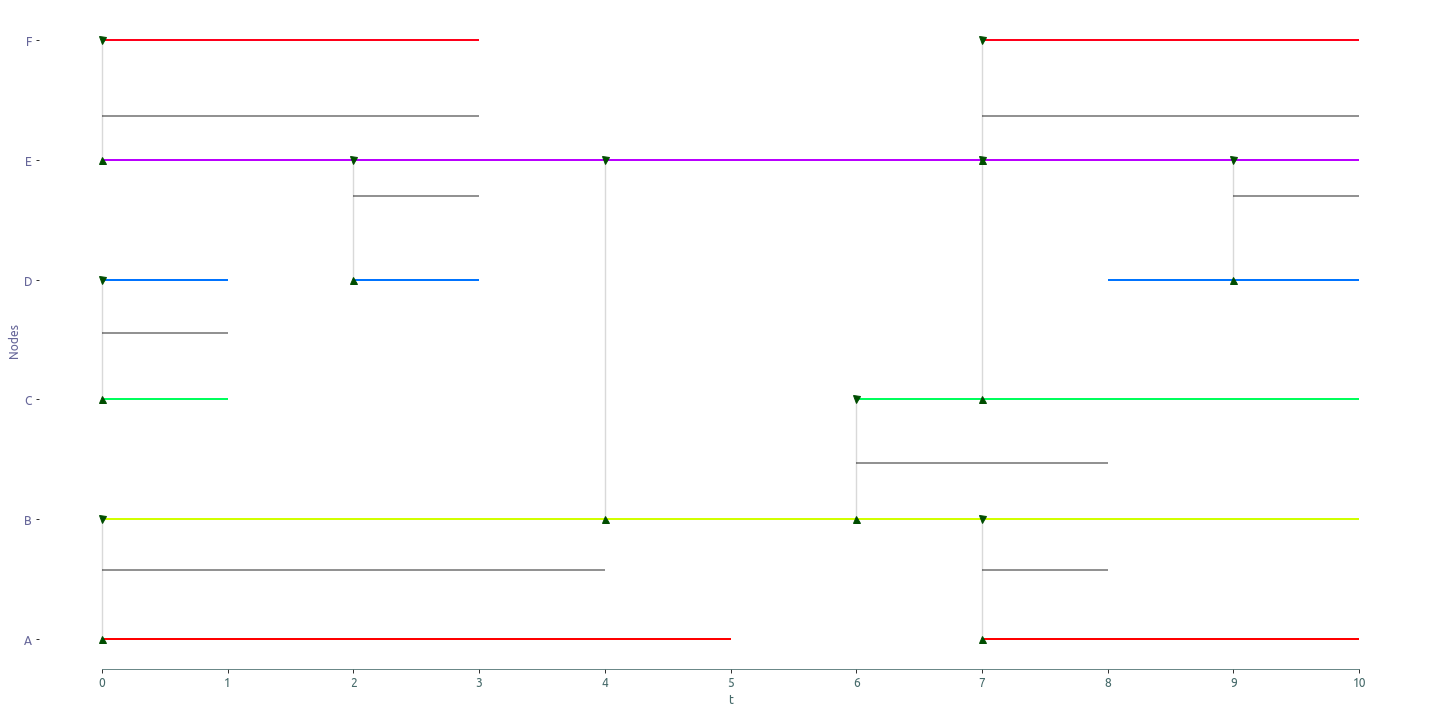

In [5]:
S.plot()

In the following we use Straph's API to compute different types of temporal paths.

 We can consider two types of source and destination : a temporal node $(t_0,t_1,v) \in \overline{W}$ or a node $u \in V$.
Resulting in 4 types of paths:
    - temporal source -> destination
    - temporal source -> temporal destination
    - source -> temporal destination
    - source -> destination

We consider the following types of temporal paths and their corresponding features:
    - Foremost Path - Time To Reach
    - Fastest Path - Latency
    - Shortest Path - Distance
    - Foremost Shortest Path - Distance, Duration
    - Fastest Shortest Path - Distance, Duration
    - Shortest Fastest Path - Latency, Length

In [6]:
label_to_node = {v:k for k,v in S.node_to_label.items()}

# 1. Source - Destination Paths Algorithms

## 1.1 Foremost Path

Let's start with a temporal source and a temporal destination.

In [7]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 

Let's compute the time to reach (8,10,D) from (0,5,A). By default the starting time is $b$ if the source is $(b,e,u)$.

In [8]:
ttr = S.times_to_reach(source,destination)
ttr

9.0

We can specify a starting time, which belong to the temporal source (obviously), let's say 4.

In [9]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
start_time = 4
ttr = S.times_to_reach(source,destination,start_time)
ttr

5.0

Now, with a source node and a temporal destination:

In [10]:
source = label_to_node['A']
destination = (8,10,label_to_node['D'])
ttr = S.times_to_reach(source,destination)
ttr

2.0

Let's add a starting time:

In [11]:
source = label_to_node['A']
destination = (8,10,label_to_node['D'])
start_time = 8
ttr = S.times_to_reach(source,destination,start_time)
ttr

inf

Finally with a source node and a destination node:

In [12]:
source = label_to_node['A']
destination = label_to_node['D']
ttr = S.times_to_reach(source,destination)
ttr

2.0

Let's add a starting time:

In [13]:
source = label_to_node['A']
destination = label_to_node['D']
start_time = 3
ttr = S.times_to_reach(source,destination,start_time)
ttr

6.0

The API is the same for all type of minimum temporal path (the start_time option is only available for foremost path and shortest foremost path).

## 1.2 Shortest Foremost Path

In [14]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
ttr,length = S.times_to_reach_and_lengths(source,destination)
ttr,length

(9.0, 3)

In [15]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
start_time = 4
ttr = S.times_to_reach_and_lengths(source,destination,start_time)
ttr

(5.0, 3)

## 1.3 Shortest Path

In [16]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
distances = S.distances(source,destination)
distances

3

In [17]:
source = label_to_node['A']
destination = label_to_node['D']
distances = S.distances(source,destination)
distances

3

## 1.4 Fastest Shortest Path

In [18]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
distances,durations = S.distances_and_durations(source,destination)
distances,durations

(3, 5.0)

In [19]:
source = label_to_node['A']
destination = label_to_node['D']
distances,durations = S.distances_and_durations(source,destination)
distances,durations

(3, 5.0)

## 1.5 Fastest Path

In [20]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
latencies = S.latencies(source,destination)
latencies

5.0

In [21]:
source = label_to_node['A']
destination = label_to_node['D']
latencies = S.latencies(source,destination)
latencies

2.0

## 1.6 Shortest Fastest Path

In [22]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
latencies,lengths = S.latencies_and_lengths(source,destination)
latencies,lengths

(5.0, 3)

In [23]:
source = label_to_node['A']
destination = label_to_node['D']
latencies,lengths = S.latencies_and_lengths(source,destination)
latencies,lengths

(2.0, 3)

# 2. Single Source Paths Algorithms

The input for a single source can be a source node or a temporal source node.

In [24]:
source = (0,5,label_to_node['A'])
ttr = S.times_to_reach(source)
ttr

{0: 0, 1: 0.0, 4: 4.0, 2: 6.0, 5: 7.0, 3: 9.0}

In [25]:
source = (0,5,label_to_node['A'])
start_time = 3
ttr = S.times_to_reach(source,start_time=start_time)
ttr

{0: 0, 1: 0, 4: 1.0, 2: 3.0, 5: 4.0, 3: 6.0}

In [26]:
source = label_to_node['A']
ttr = S.times_to_reach(source)
ttr

{0: 0.0, 1: 0.0, 4: 0.0, 2: 0.0, 5: 0.0, 3: 2.0}

In [27]:
source = label_to_node['A']
start_time = 7
ttr = S.times_to_reach(source,start_time=start_time)
ttr

{0: 0, 1: 0.0, 2: 0.0, 4: 0.0, 5: 0.0, 3: 2.0}

FSP

In [28]:
source = label_to_node['A']
distances,durations = S.distances_and_durations(source)
distances,durations

({0: 0, 1: 1, 4: 2, 2: 2, 5: 3, 3: 3},
 {0: 0, 1: 0, 4: 0.0, 2: 0, 5: 3.0, 3: 5.0})

SFP

In [29]:
source = label_to_node['A']
latencies,lengths = S.latencies_and_lengths(source)
latencies,lengths

({0: 0, 1: 0, 4: 0.0, 2: 0, 5: 0.0, 3: 2.0},
 {0: 0, 1: 1, 4: 2, 2: 2, 5: 3, 3: 3})

# 3. Pairwise Paths Algorithms

We can also use a Pairwise Algorithm to compute all paths pairwise in the Stream Graph.

In [30]:
all_ttr = S.times_to_reach()
for s in all_ttr:
    print("source :",S.node_to_label[s[2]])
    for d in all_ttr[s]:
        print("\t destination :",S.node_to_label[d], "ttr :",all_ttr[s][d])

source : A
	 destination : A ttr : 0.0
	 destination : B ttr : 0.0
	 destination : E ttr : 4.0
	 destination : C ttr : 6.0
	 destination : F ttr : 7.0
	 destination : D ttr : 9.0
source : A
	 destination : A ttr : 0.0
	 destination : B ttr : 0.0
	 destination : C ttr : 0.0
	 destination : E ttr : 0.0
	 destination : F ttr : 0.0
	 destination : D ttr : 2.0
source : B
	 destination : B ttr : 0.0
	 destination : A ttr : 0.0
	 destination : E ttr : 4.0
	 destination : C ttr : 6.0
	 destination : F ttr : 7.0
	 destination : D ttr : 9.0
source : C
	 destination : C ttr : 0.0
	 destination : D ttr : 0.0
source : C
	 destination : C ttr : 0.0
	 destination : B ttr : 0.0
	 destination : A ttr : 1.0
	 destination : E ttr : 1.0
	 destination : F ttr : 1.0
	 destination : D ttr : 3.0
source : D
	 destination : D ttr : 0.0
	 destination : C ttr : 0.0
source : D
	 destination : D ttr : 0.0
	 destination : E ttr : 0.0
	 destination : F ttr : 0.0
	 destination : B ttr : 2.0
	 destination : A ttr : 2.0

In [31]:
all_distances = S.distances()
for s in all_distances:
    print("source :",S.node_to_label[s[2]])
    for d in all_distances[s]:
        print("\t destination :",S.node_to_label[d], "distance :",all_distances[s][d])

source : A
	 destination : A distance : 0
	 destination : B distance : 1
	 destination : E distance : 2
	 destination : C distance : 2
	 destination : F distance : 3
	 destination : D distance : 3
source : A
	 destination : A distance : 0
	 destination : B distance : 1
	 destination : C distance : 2
	 destination : E distance : 3
	 destination : F distance : 4
	 destination : D distance : 4
source : B
	 destination : B distance : 0
	 destination : A distance : 1
	 destination : E distance : 1
	 destination : C distance : 1
	 destination : F distance : 2
	 destination : D distance : 2
source : C
	 destination : C distance : 0
	 destination : D distance : 1
source : C
	 destination : C distance : 0
	 destination : B distance : 1
	 destination : A distance : 2
	 destination : E distance : 1
	 destination : F distance : 2
	 destination : D distance : 2
source : D
	 destination : D distance : 0
	 destination : C distance : 1
source : D
	 destination : D distance : 0
	 destination : E distan

In [32]:
all_distances,all_durations = S.distances_and_durations()
for s in all_distances:
    print("source :",S.node_to_label[s[2]])
    for d in all_distances[s]:
        print("\t destination :",S.node_to_label[d], "distances :",all_distances[s][d]," duration :",all_durations[s][d])

source : A
	 destination : A distances : 0  duration : 0
	 destination : B distances : 1  duration : 0
	 destination : E distances : 2  duration : 0.0
	 destination : C distances : 2  duration : 2.0
	 destination : F distances : 3  duration : 3.0
	 destination : D distances : 3  duration : 5.0
source : A
	 destination : A distances : 0  duration : 0
	 destination : B distances : 1  duration : 0
	 destination : C distances : 2  duration : 0
	 destination : E distances : 3  duration : 0.0
	 destination : F distances : 4  duration : 0.0
	 destination : D distances : 4  duration : 2.0
source : B
	 destination : B distances : 0  duration : 0
	 destination : A distances : 1  duration : 0
	 destination : E distances : 1  duration : 0.0
	 destination : C distances : 1  duration : 0
	 destination : F distances : 2  duration : 3.0
	 destination : D distances : 2  duration : 5.0
source : C
	 destination : C distances : 0  duration : 0
	 destination : D distances : 1  duration : 0
source : C
	 des

In [33]:
all_latencies,all_lengths = S.latencies_and_lengths()
for s in all_latencies:
    print("source :",S.node_to_label[s[2]])
    for d in all_latencies[s]:
        print("\t destination :",S.node_to_label[d], "latency :",all_latencies[s][d]," length:",all_lengths[s][d])

source : A
	 destination : A latency : 0  length: 0
	 destination : B latency : 0  length: 1
	 destination : E latency : 0.0  length: 2
	 destination : C latency : 2.0  length: 2
	 destination : F latency : 3.0  length: 3
	 destination : D latency : 5.0  length: 3
source : A
	 destination : A latency : 0  length: 0
	 destination : B latency : 0  length: 1
	 destination : C latency : 0  length: 2
	 destination : E latency : 0.0  length: 3
	 destination : F latency : 0.0  length: 4
	 destination : D latency : 2.0  length: 4
source : B
	 destination : B latency : 0  length: 0
	 destination : A latency : 0  length: 1
	 destination : E latency : 0.0  length: 1
	 destination : C latency : 0  length: 1
	 destination : F latency : 0.0  length: 3
	 destination : D latency : 2.0  length: 3
source : C
	 destination : C latency : 0  length: 0
	 destination : D latency : 0  length: 1
source : C
	 destination : C latency : 0  length: 0
	 destination : B latency : 0  length: 1
	 destination : A laten

In [34]:
# Fastest Path
latency = S.latencies_ss(source)
latency_label = {S.node_to_label[k]: latency[k] for k in latency}
print("Latencies :",latency_label)

AttributeError: 'stream_graph' object has no attribute 'latencies_ss'

In [ ]:
# Shortest Path
distance = S.distances_ss(source)
distance_label = {S.node_to_label[k]: distance[k] for k in distance}
print("Distances :",distance_label)

In [ ]:
# Shortest Foremost Path
d,l = S.ttr_and_distance_SFOP_ss(source)
d_label = {S.node_to_label[k]: d[k] for k in d}
l_label = {S.node_to_label[k]: l[k] for k in l}
print("Times to Reach :",l_label)
print("Lengths :",d_label)

In [ ]:
# Fastest Shortest Path
d,l = S.distance_and_duration_FSP_ss(source)
d_label = {S.node_to_label[k]: d[k] for k in d}
l_label = {S.node_to_label[k]: l[k] for k in l}
print("Distances :",d_label)
print("Durations :",l_label)

In [ ]:
# Shortest Fastest Path
l,d = S.latency_and_length_SFP_ss(source)
d_label = {S.node_to_label[k]: d[k] for k in d}
l_label = {S.node_to_label[k]: l[k] for k in l}
print("Latencies :",l_label)
print("Lengths :",d_label)

### 1.1 Temporal Source Node - Temporal Destination Node

Firstly we use $L-algorithm$ to compute temporal paths:

It is possible to plot these paths on top of the stream graph:

In [ ]:
# Foremost Path
ttr = S.time_to_reach(source,destination)
fop = S.foremost_path(source,destination)
# Fastest Path
latency = S.latency(source,destination)
fp = S.fastest_path(source,destination)
# Shortest Path
distance = S.distance(source,destination)
sp = S.shortest_path(source,destination)
# Shortest Foremost Path
d,l = S.ttr_and_distance_SFOP(source,destination)
fosp = S.foremost_shortest_path(source,destination)
# Fastest Shortest Path
d,l = S.distance_and_duration_FSP(source,destination)
fsp = S.fastest_shortest_path(source,destination)
# Shortest Fastest Path
l,d = S.latency_and_duration_SFP(source,destination)
sfp = S.shortest_fastest_path(source,destination)

In [ ]:
S.plot_path(fp) # TODO : Import fonctions from path object

We can also proceed to separate the stream graph into weakly connected components to enable parallel computation or to speed up the computation.

TODO : Rajouter les WCC substreams comme des attributs d'un objet avec des dictionnaire reliant label au couple (id wcc,new node) our node au couple (id wcc,new node).
    Sur cet objet on peut rajouter des methodes avec l'option parallel = True.

In [ ]:
list_wcc, node_to_wcc = S.wcc_as_substreams()

We propose alternative methods to compute Foremost Paht and Fastest Path using the Condensation Graph of $S$.

In [ ]:
dag = S.condensation_dag()

# Foremost Path
ttr = dag.time_to_reach(source,destination)
fop = dag.foremost_path(source,destination) # Path in DAG (ok)

# Fastest Path
latency = dag.latency(source,destination)
fp = dag.fastest_path(source,destination) # Path in DAG (ok)

# Shortest Fastest Path
# TODO : Method Hybrid , path should be in S
l,d = dag.latency_and_duration_SFP(S,source,destination)
sfp = dag.shortest_fastest_path(S,source,destination) # Path In  Stream

# Shortest Foremost Path
# TODO : Method Hybrid , path should be in S
d,l = dag.ttr_and_distance_SFOP(source,destination)
fosp = dag.foremost_shortest_path(source,destination) # Path In Stream

### 1.2 Source Node - Temporal Destination Node

In [ ]:
source = ('A')
destination = (0,8,'B')

### 1.3 Temporal Source Node - Destination Node

In [ ]:
source = (0,10,'A')
destination = ('B')

### 1.4 Source Node - Destination Node

In [ ]:
source = ('A')
destination = ('B')

# 2: Single Source Paths Algorithms

### 2.1 Temporal Source Node - Temporal Destination Nodes

In [ ]:
source = (0,10,'A')
destination = (0,8,'B')

### 2.2 Source Node - Temporal Destination Nodes

In [ ]:
source = ('A')
destination = (0,8,'B')

### 2.3 Temporal Source Node - Destination Nodes

In [ ]:
source = (0,10,'A')
destination = ('B')

### 2.4 Source Node - Destination Nodes

In [ ]:
source = ('A')
destination = ('B')

# 3: Pairwise Algorithms

### 3.1 Temporal Source Nodes - Temporal Destination Nodes

In [ ]:
source = (0,10,'A')
destination = (0,8,'B')

### 3.2 Source Nodes - Temporal Destination Nodes

In [ ]:
source = ('A')
destination = (0,8,'B')

### 3.3 Temporal Source Nodes - Destination Nodes

In [ ]:
source = (0,10,'A')
destination = ('B')

### 3.4 Source Nodes - Destination Nodes

In [ ]:
source = ('A')
destination = ('B')

# ZBEUL

In [ ]:
for n,np in zip(S.nodes,S.node_presence):
    for t0,t1 in zip(np[::2],np[1::2]):
        source = (t0,t1,n)
        print("source :",source)
        fp,lat = dag.all_fastest_paths_ss(source)
        print("\tlat :",lat)
        print("\tfp :",fp)
    break

In [ ]:
list_WCC,node_to_id_wcc = S.wcc_as_substreams()  # Getting list WCC
wcc_node_to_stream_node = {tuple(j) : k for k,v in node_to_id_wcc.items() for j in v}
# print(wcc_node_to_stream_node)
for G in list_WCC:
    if G.links:
        print("\n ID :",G.id)
        G.plot()
        for v in G.nodes:
            print(v," : ",wcc_node_to_stream_node[(G.id,v)])


In [ ]:
list_CDAG = sg.condensation_dag_from_wcc(list_WCC)  # Getting list Condensation DAG from WCC
for G in list_CDAG:
    if G.c_links:
        print("\n id :",G.id)
        G.plot()
        nodes = set([n for c in G.c_nodes for n in c.nodes])
        for v in nodes:
            print(v," : ",wcc_node_to_stream_node[(G.id,v)])
        

In [ ]:
segmented_node_to_id_wcc = {}
for n,np in zip(S.nodes,S.node_presence):
    wccs = node_to_id_wcc[n]
    for id_wcc,new_n in node_to_id_wcc[n]:
        G = list_WCC[id_wcc]
        for a,b in zip(G.node_presence[new_n][::2],G.node_presence[new_n][1::2]):
            for t0,t1 in zip(np[::2],np[1::2]):
                if t0==a and t1 == b:
                    segmented_node_to_id_wcc[(t0,t1,n)]=(id_wcc,new_n)
                    break
print("seg to wcc :",segmented_node_to_id_wcc)

In [ ]:
D,L = {},{}
# On Whole Stream Graph
dag = S.condensation_dag()
for n,np in zip(S.nodes,S.node_presence):
    for t0,t1 in zip(np[::2],np[1::2]):
        source = (t0,t1,n)
        print("\nSource :",source)
        l,d = dag.all_fastest_paths_ss(source)
        for destination in l:
            print(destination,":",d[destination])
            print(l[destination])
#         D[source] = d
#         L[source] = l

In [ ]:
D,L = {},{}
# On Whole Stream Graph
dag = S.condensation_dag()
for n,np in zip(S.nodes,S.node_presence):
    for t0,t1 in zip(np[::2],np[1::2]):
        source = (t0,t1,n)
        print("\nSource :",source)
        l,d = dag.shortest_fastest_path_ss(source)
        print("latencies SFP :",l)
        print("lengths SFP :",d)

In [ ]:
# On WCC substreams
for n,np in zip(S.nodes,S.node_presence):
    for t0,t1 in zip(np[::2],np[1::2]):
        source = (t0,t1,n)
        print("\nSource :",source)
        id_wcc,new_n = segmented_node_to_id_wcc[source]
        G = list_WCC[id_wcc]
        l,d = G.shortest_fastest_path((t0,t1,new_n))
        new_l,new_d = {},{}
        for k,v in l.items():
            new_l[wcc_node_to_stream_node[(G.id,k)]] = v
        for k,v in d.items():
            new_d[wcc_node_to_stream_node[(G.id,k)]]=v
        print("length SFP :",new_d)
        print("latencies SFP :",new_l)
        assert new_d == D[source]
        assert new_l == L[source]

In [ ]:
# On substreams stems from DAG Path:
for n,np in zip(S.nodes,S.node_presence):
    for t0,t1 in zip(np[::2],np[1::2]):
        source = (t0,t1,n)
        print("\nSource :",source)
        id_wcc,new_n = segmented_node_to_id_wcc[source]
        G = list_CDAG[id_wcc]
        new_l = {}
        fastest_path = {}
        for n2,np2 in zip(list_WCC[id_wcc].nodes,list_WCC[id_wcc].node_presence):
            for a,b in zip(np2[::2],np2[1::2]):
                print("\tdestination :",(a,b,wcc_node_to_stream_node[(G.id,n2)]))
                fp,l = G.fastest_path(source = (t0,t1,new_n), destination = (a,b,n2))
                print("\tl :",l)
                if fp is not None:
                    if wcc_node_to_stream_node[(G.id,n2)] in new_l:
                        if l <= new_l[wcc_node_to_stream_node[(G.id,n2)]]:
                            new_l[wcc_node_to_stream_node[(G.id,n2)]] = l
                            fastest_path[wcc_node_to_stream_node[(G.id,n2)]] = fp
                    else:
                        new_l[wcc_node_to_stream_node[(G.id,n2)]] = l
                        fastest_path[wcc_node_to_stream_node[(G.id,n2)]] = fp
        G.plot()            
        for k,v in fastest_path.items():
            print("destination :",k)
            print("Path :",v)
            H = G.condensation_path_as_substream(v)
            H.plot()
            
        print("latencies SFP :",new_l)   
        break
    break
#         new_l,new_d = {},{}
#         for k,v in l.items():
#             new_l[wcc_node_to_stream_node[(G.id,k)]] = v
#         for k,v in d.items():
#             new_d[wcc_node_to_stream_node[(G.id,k)]]=v
#         print("length SFP :",new_d)
#         print("latencies SFP :",new_l)